#### 로지스틱 회귀 
- 선형 모델 기반으로 분류를 해주는 모델
- 종속변수 즉, 타겟이 범주형 인 경우에 적용 
- 결과를 확률로 변환해서 처리
- 종류
    * 2진 분류 : 타겟의 클래스가 2개
    * 다중분류 : 타겟의 클래스가 3개 이상

### 데이터 준비하기

In [197]:
# 모듈로딩 
import pandas as pd

# 판다스에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format

# 데이터 준비 
DATA_FILE = '../data/fish.csv'

In [198]:
## CSV ==> DataFrame
fishDF = pd.read_csv(DATA_FILE)
fishDF.head(2)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.00000,25.40000,30.00000,11.52000,4.02000
1,Bream,290.00000,26.30000,31.20000,12.48000,4.30560


In [199]:
# 타겟/종속변수의 클래스 수 => 7개
print(pd.unique(fishDF['Species']))
fishDF.columns

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [200]:
# 피쳐 데이터셋 추출 
featureDF = fishDF[fishDF.columns[1:]].to_numpy()
print(featureDF[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [201]:
# 타겟 추출 
targetSR = fishDF['Species'].to_numpy()
print(targetSR[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


- 학습용 데이터셋 준비 : trainDS, testDS

In [202]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featureDF, 
                                                    targetSR, 
                                                    random_state=10,
                                                    stratify=targetSR)

- 표준화 진행 => 정규분포 

In [203]:
from sklearn.preprocessing import StandardScaler

# 학습용(trainDS)기반 스케일러 생성
ss = StandardScaler()
ss.fit(X_train)

# 스케일링 진행
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

print(train_scaled.shape, test_scaled.shape)

(119, 5) (40, 5)


- 학습 진행 
    * 학습방법 : 지도학습 > 분류
    * 알고리즘 : 로지스틱 회귀 
        * 종속변수 즉, 피쳐에 가중치 곱셈 후 합계 한 결과 >>> 확률값으로 변환값 

In [224]:
import numpy as np
import matplotlib.pyplot as plt

# 과학적/지수 표기법 대신 소수점 6자리까지 출력
np.set_printoptions(precision=6, suppress=True)

# 선형식의 결과값 ==> 0.0~1.0 범위의 확률비 값으로 변환 
z = np.arange(-5, 5, 0.1)   # -5.0<= ~ <5.0
phi = 1 / (1 + np.exp(-z))

print(f'np.exp(-z) = {np.exp(-z)}') 
print(f'z =>{z}\n phi = {phi}')

np.exp(-z) = [148.413159 134.28978  121.510418 109.947172  99.484316  90.017131
  81.450869  73.699794  66.686331  60.340288  54.59815   49.402449
  44.701184  40.447304  36.598234  33.115452  29.9641    27.112639
  24.53253   22.197951  20.085537  18.174145  16.444647  14.879732
  13.463738  12.182494  11.023176   9.974182   9.025013   8.16617
   7.389056   6.685894   6.049647   5.473947   4.953032   4.481689
   4.0552     3.669297   3.320117   3.004166   2.718282   2.459603
   2.225541   2.013753   1.822119   1.648721   1.491825   1.349859
   1.221403   1.105171   1.         0.904837   0.818731   0.740818
   0.67032    0.606531   0.548812   0.496585   0.449329   0.40657
   0.367879   0.332871   0.301194   0.272532   0.246597   0.22313
   0.201897   0.182684   0.165299   0.149569   0.135335   0.122456
   0.110803   0.100259   0.090718   0.082085   0.074274   0.067206
   0.06081    0.055023   0.049787   0.045049   0.040762   0.036883
   0.033373   0.030197   0.027324   0.024724   0.022

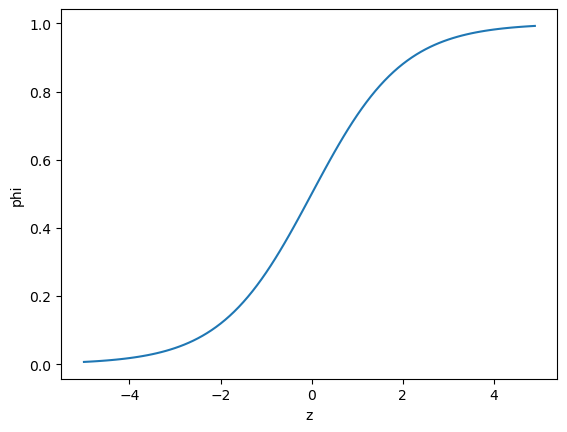

In [205]:

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

In [206]:
# Boolean Index 
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [207]:
### 2진분류 ==> 2개 품종의 데이터셋 추출
mask = (y_train == 'Bream') | (y_train == 'Smelt')

train_bream_smelt = train_scaled[mask]
target_bream_smelt = y_train[mask]


mask = (y_test == 'Bream') | (y_test == 'Smelt')
test_bream_smelt = test_scaled[mask]
test_target_bream_smelt = y_test[mask]

- 학습 진행 

In [208]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [209]:
## 모델 파라미터
print(f'classes_ : {lr.classes_} , {len(lr.classes_)}개')
print(f'n_features_in_ : {lr.n_features_in_}')
print(f'n_iter_ : {lr.n_iter_}')
print(f'coef_ : {lr.coef_}, {len(lr.coef_[0])}개')
print(f'intercept_ : {lr.intercept_}')

classes_ : ['Bream' 'Smelt'] , 2개
n_features_in_ : 5
n_iter_ : [13]
coef_ : [[-0.443163 -0.600773 -0.684162 -1.027121 -0.767243]], 5개
intercept_ : [-2.230105]


In [210]:
### 모델의 성능 => train과 test에 대한 점수 즉, 분류의 정확도 
### model.score(feature, target) : 내부에서  predict() 호출 결과 예측값과 target 비교 
train_score = lr.score(train_bream_smelt, target_bream_smelt)
test_score = lr.score(test_bream_smelt, test_target_bream_smelt)

print(f'train_score : {train_score},   test_score : {test_score}')

train_score : 1.0,   test_score : 1.0


- 테스팅 진행 => predict(피쳐2D)
    * predict()  : 예측 클래스 반환
    * predict_proba() : 각 클래스별 확률값 
    * decision_function : 피쳐와 coef_ 곱셈 합계 + intercept_ 한 결과값 

In [211]:
print(lr.predict(train_bream_smelt[:5]))

['Smelt' 'Smelt' 'Bream' 'Bream' 'Bream']


In [212]:
print(lr.classes_[1], lr.predict_proba(train_bream_smelt[:5]), sep='\n')

Smelt
[[0.03185  0.96815 ]
 [0.070079 0.929921]
 [0.999494 0.000506]
 [0.934717 0.065283]
 [0.994045 0.005955]]


In [213]:
fishDF.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [214]:
# y = 'Weight'*coef_[0] +  'Length'*coef_[1] + 'Diagonal'*coef_[2] + 'Height'*coef_[3] +'Width'*coef_[4] + intercept_
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[ 3.414347  2.585481 -7.588453 -2.66151  -5.117616]


In [215]:
# 선형식 결과값 ==> 확률 변환 , 클래스가 1인 것에 대한 확률 계산
from scipy.special import expit
print(expit(decisions))

print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.predict(train_bream_smelt[:5]))

[0.96815  0.929921 0.000506 0.065283 0.005955]
[[0.03185  0.96815 ]
 [0.070079 0.929921]
 [0.999494 0.000506]
 [0.934717 0.065283]
 [0.994045 0.005955]]
['Smelt' 'Smelt' 'Bream' 'Bream' 'Bream']


### 로지스틱 회귀로 다중 분류 수행하기

In [239]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, y_train)

print(lr.score(train_scaled, y_train))
print(lr.score(test_scaled, y_test))

0.907563025210084
0.975


In [217]:
print(lr.predict(test_scaled[:5]))

['Bream' 'Bream' 'Perch' 'Perch' 'Perch']


In [237]:
proba = lr.predict_proba(test_scaled[:5])
proba, proba.argmax(axis=1), lr.classes_
#print(np.round(proba, decimals=4))

(array([[0.995041, 0.002099, 0.      , 0.      , 0.000012, 0.      ,
         0.002847],
        [0.998177, 0.000204, 0.      , 0.      , 0.000002, 0.      ,
         0.001617],
        [0.000092, 0.010744, 0.653864, 0.00203 , 0.300998, 0.003303,
         0.028968],
        [0.000005, 0.000453, 0.881918, 0.002074, 0.105139, 0.002835,
         0.007577],
        [0.000048, 0.046871, 0.560773, 0.000739, 0.353097, 0.013031,
         0.025441]]),
 array([0, 0, 2, 2, 2], dtype=int64),
 array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
       dtype=object))

In [219]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [238]:
lr.predict(test_scaled[:5])


array(['Bream', 'Bream', 'Perch', 'Perch', 'Perch'], dtype=object)

In [221]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=4))

[[ 11.795    5.6335  -3.3043  -3.4571   0.5077 -17.1134   5.9386]
 [ 13.265    4.7678  -3.181   -2.5284  -0.0409 -19.1222   6.8397]
 [ -4.8762  -0.1185   3.99    -1.7847   3.2142  -1.2979   0.8733]
 [ -6.6068  -2.0981   5.4763  -0.5762   3.3495  -0.2639   0.7193]
 [ -5.687    1.2044   3.6863  -2.9452   3.2238  -0.0756   0.5934]]


In [222]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=4))

[[0.995  0.0021 0.     0.     0.     0.     0.0028]
 [0.9982 0.0002 0.     0.     0.     0.     0.0016]
 [0.0001 0.0107 0.6539 0.002  0.301  0.0033 0.029 ]
 [0.     0.0005 0.8819 0.0021 0.1051 0.0028 0.0076]
 [0.     0.0469 0.5608 0.0007 0.3531 0.013  0.0254]]
